<a href="https://colab.research.google.com/github/crsimmons1/lifeexpectancy/blob/master/Regression/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN - Predicting Life Expectancy**
This data can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who) on Kaggle. Please see this git [repository](https://github.com/crsimmons1/lifeexpectancy) for more information on the data cleaning that was done. 

The explanatory variables included are:
* **TExpenditure** (Total Expenditure) - General government expenditure on health as a percentage of total government expenditure (%)
* **AdultMortality** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* **InfantDeaths** Number of Infant Deaths per 1,000 population
* **Alcohol**, recorded per capita (15+) consumption (in litres of pure alcohol)
* **HepB** (Hepatitis B) immunization coverage among 1-year-olds (%)
* **Measles** - number of reported cases per 1000 population
* **BMI** Average Body Mass Index of entire population
* **5deaths** Number of under-five deaths per 1000 population
* **Polio** (Pol3) immunization coverage among 1-year-olds (%)
* **Diphtheria** tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **HIV** Deaths per 1,000 live births HIV/AIDS (0-4 years)
* **GDP** Gross Domestic Product per capita (in USD)
* **Population** of the country
* **ThinJuvenile** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* **ThinChild** Prevalence of thinness among children for Age 5 to 9(%)
##**Import Data**


In [0]:
import pandas as pd
import numpy as np

# Import data
data= pd.read_csv("cleaned_data.csv")

# Split in X and y 
y = pd.DataFrame(data.LifeExpectancy)
X = data.drop(columns=['LifeExpectancy','TExp', 'Year', 'Status'])

#Train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

## **KNN for a Row, by Hand (Numpy/Pandas)**

In [11]:
# Define a distance metric
def euclidean_distance(row1, row2):
    instance1 = np.array(row1) 
    instance2 = np.array(row2)
    return np.linalg.norm(row1 - row2)

# Verify on two rows 
print(euclidean_distance(X_train.iloc[3], X_test.iloc[44]))

3873551.8350223997


In [0]:
distances = [] 
def get_neighbors(training_X, training_y, test_row, k, distance):
    for index in range(len(training_X)): #for every training row ...
        dist = distance(test_row, training_X.iloc[index]) # ... find the distance between that and the test row 
        distances.append((training_X.iloc[index], dist, training_y.iloc[index])) #...append it to an empty list 
    distances.sort(key=lambda x: x[1]) # sort these distances
    neighbors = distances[:k] #take the top most k distances
    return(neighbors) #return the list

In [0]:
X_train.iloc[5]

Status            0.000000e+00
AdultMortality    1.200000e+01
InfantDeaths      0.000000e+00
Alcohol           4.140000e+00
Expenditure       3.986518e+01
HepB              8.204859e+01
Measles           1.800000e+01
BMI               4.940000e+01
5deaths           0.000000e+00
Polio             8.700000e+01
TExpenditure      7.940000e+00
Diphtheria        8.700000e+01
HIV               1.000000e-01
GDP               2.214732e+03
Population        3.779247e+06
ThinJuvenile      3.000000e+00
ThinChild         3.000000e+00
IncomeComp        0.000000e+00
Schooling         1.210000e+01
Name: 312, dtype: float64

In [0]:
get_neighbors(X_train, # input variables 
              y_train, # the output variables 
              X_test.iloc[5], # what 
              3, #K
              distance=euclidean_distance) #some distance metric

[(Status            0.000000e+00
  AdultMortality    8.800000e+01
  InfantDeaths      1.000000e+00
  Alcohol           3.000000e-02
  Expenditure       2.078393e+03
  HepB              9.900000e+01
  Measles           0.000000e+00
  BMI               6.750000e+01
  5deaths           1.000000e+00
  Polio             9.900000e+01
  TExpenditure      1.930000e+00
  Diphtheria        9.900000e+01
  HIV               1.000000e-01
  GDP               5.557200e+04
  Population        5.465236e+06
  ThinJuvenile      3.300000e+00
  ThinChild         3.100000e+00
  IncomeComp        7.870000e-01
  Schooling         1.380000e+01
  Name: 1242, dtype: float64, 22442.176115492563, LifeExpectancy    73.8
  Name: 1242, dtype: float64), (Status            1.000000e+00
  AdultMortality    9.300000e+01
  InfantDeaths      0.000000e+00
  Alcohol           1.099000e+01
  Expenditure       9.703068e+03
  HepB              7.096505e+01
  Measles           2.000000e+00
  BMI               5.590000e+01
  5dea

## **KNN via sklearn**

### Model 1 - Initial Fitting 

In [18]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model, set the number of neighbors to consider to 3
knn = KNeighborsRegressor(n_neighbors=3)

# fit the model to training data
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [19]:
from sklearn import metrics
from math import sqrt

RESULTS = {}
def evaluate_model(y_test, y_train, y_pred_test, y_pred_train):# Function to evaluate model 
    return { # First test, then training 
        # Mean Squared Error 
        "MSE" : metrics.mean_squared_error(y_test, y_pred_test),
        "MSE_train" : metrics.mean_squared_error(y_train, y_pred_train),
        # Root Mean Squared Error 
        "RMSE" : sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
        "RMSE_train" : sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
        # Mean Absolute Error 
        "MAE": metrics.mean_absolute_error(y_test, y_pred_test),
        "MAE_train": metrics.mean_absolute_error(y_train, y_pred_train),
        # Explained Variance 
        "exp_var": metrics.explained_variance_score(y_test, y_pred_test),
        "exp_var_train": metrics.explained_variance_score(y_train, y_pred_train),
        # Coefficient of Determination
        "r^2" : metrics.r2_score(y_test, y_pred_test),
        "r^2_train" : metrics.r2_score(y_train, y_pred_train)}

# Evaluation Metrics 
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
RESULTS["KNN3"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)




,KNN3
MAE,7.210388
MAE_train,4.926453
MSE,88.281026
MSE_train,43.839515
RMSE,9.395798
RMSE_train,6.621142
exp_var,0.076402
exp_var_train,0.491991
r^2,0.076369
r^2_train,0.491944


### Model 2- Initial Scaled Model


In [0]:
# Scale the Features
from sklearn.preprocessing import StandardScaler
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)

# Apply the scaler to the test data
X_test = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

In [0]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model, set the number of neighbors to consider to 3
knn_scale = KNeighborsRegressor(n_neighbors=3)

In [22]:
# fit the model to training data
knn_scale.fit(X_train, y_train)

# Evaluation Metrics 
y_pred_train = knn_scale.predict(X_train)
y_pred_test = knn_scale.predict(X_test)
RESULTS["KNN3_scaled"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

,KNN3,KNN3_scaled
MSE,88.281026,8.099936
MSE_train,43.839515,3.134596
RMSE,9.395798,2.846039
RMSE_train,6.621142,1.770479
MAE,7.210388,1.860421
MAE_train,4.926453,1.131029
exp_var,0.076402,0.915326
exp_var_train,0.491991,0.963769
r^2,0.076369,0.915255
r^2_train,0.491944,0.963673


### Model 3 - Find best K value

RSME is the metric which was used to evaluate which value of K is best. Based on the plot of K vs. RSME of test data, 7-9 would be optimal choices. Grid search identified 9 as the optimal value. 

In [0]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import neighbors


rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

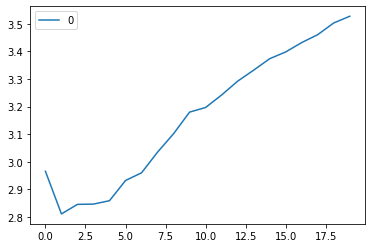

In [24]:
#plotting the rmse values against k values
RSMEp = pd.DataFrame(rmse_val) #elbow curve 
RSMEp.plot()

In [25]:
# Grid Search
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model, k=2
knn2 = KNeighborsRegressor(n_neighbors=2)

# fit the model to training data
knn2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [27]:
# fit the model to training data
knn2.fit(X_train, y_train)

# Evaluation Metrics 
y_pred_train = knn2.predict(X_train)
y_pred_test = knn2.predict(X_test)
RESULTS["KNN2_scaled"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

,KNN3,KNN3_scaled,KNN2_scaled
MSE,88.281026,8.099936,7.904467
MSE_train,43.839515,3.134596,2.122232
RMSE,9.395798,2.846039,2.811488
RMSE_train,6.621142,1.770479,1.456788
MAE,7.210388,1.860421,1.748718
MAE_train,4.926453,1.131029,0.867259
exp_var,0.076402,0.915326,0.917369
exp_var_train,0.491991,0.963769,0.975422
r^2,0.076369,0.915255,0.917300
r^2_train,0.491944,0.963673,0.975405
